In [2]:
# Pridicting the Future trend in Fuel Economy, CO2 Emission over the period of time. 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statsmodels.api as sm
from statsmodels.formula.api import ols
gas = pd.read_csv('vehicles1.csv')

C:\DalbirData\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (43,44,45,48) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
gas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37936 entries, 0 to 37935
Data columns (total 49 columns):
year              37936 non-null int64
make              37936 non-null object
model             37936 non-null object
barrels08         37936 non-null float64
city08            37936 non-null int64
comb08            37936 non-null int64
highway08         37936 non-null int64
cylinders         37813 non-null float64
VClass            37936 non-null object
drive             36747 non-null object
displ             37815 non-null float64
co2TailpipeGpm    37936 non-null float64
engId             37936 non-null int64
eng_dscr          22567 non-null object
feScore           37936 non-null int64
fuelCost08        37936 non-null int64
fuelType          37936 non-null object
fuelType1         37936 non-null object
ghgScore          37936 non-null int64
hpv               37936 non-null int64
id                37936 non-null int64
lv2               37936 non-null int64
lv4               

In [4]:
print(gas.replace(r'', np.nan, regex=True))

       year         make                model  barrels08  city08  comb08  \
0      1985   Alfa Romeo   Spider Veloce 2000  15.695714      19      21   
1      1985      Ferrari           Testarossa  29.964545       9      11   
2      1985        Dodge              Charger  12.207778      23      27   
3      1985        Dodge  B150/B250 Wagon 2WD  29.964545      10      11   
4      1993       Subaru     Legacy AWD Turbo  17.347895      17      19   
5      1993       Subaru               Loyale  14.982273      21      22   
6      1993       Subaru               Loyale  13.184400      22      25   
7      1993       Toyota              Corolla  13.733750      23      24   
8      1993       Toyota              Corolla  12.677308      23      26   
9      1993       Toyota              Corolla  13.184400      23      25   
10     1993       Toyota              Corolla  12.677308      23      26   
11     1993   Volkswagen       Golf III / GTI  15.695714      18      21   
12     1993 

In [5]:
gas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37936 entries, 0 to 37935
Data columns (total 49 columns):
year              37936 non-null int64
make              37936 non-null object
model             37936 non-null object
barrels08         37936 non-null float64
city08            37936 non-null int64
comb08            37936 non-null int64
highway08         37936 non-null int64
cylinders         37813 non-null float64
VClass            37936 non-null object
drive             36747 non-null object
displ             37815 non-null float64
co2TailpipeGpm    37936 non-null float64
engId             37936 non-null int64
eng_dscr          22567 non-null object
feScore           37936 non-null int64
fuelCost08        37936 non-null int64
fuelType          37936 non-null object
fuelType1         37936 non-null object
ghgScore          37936 non-null int64
hpv               37936 non-null int64
id                37936 non-null int64
lv2               37936 non-null int64
lv4               

In [6]:
gas['cylinders'].fillna(0, inplace=True)
gas['drive'].fillna(0, inplace=True)
gas['displ'].fillna(0, inplace=True)
gas['eng_dscr'].fillna(0, inplace=True)
gas['trany'].fillna(0, inplace=True)
gas['guzzler'].fillna(0, inplace=True)
gas['trans_dscr'].fillna(0, inplace=True)
gas['tCharger'].fillna(0, inplace=True)
gas['sCharger'].fillna(0, inplace=True)
gas['atvType'].fillna(0, inplace=True)
gas['fuelType2'].fillna(0, inplace=True)
gas['rangeA'].fillna(0, inplace=True)
gas['evMotor'].fillna(0, inplace=True)
gas['startStop'].fillna(0, inplace=True)

In [7]:
print(gas.isnull().sum())

year              0
make              0
model             0
barrels08         0
city08            0
comb08            0
highway08         0
cylinders         0
VClass            0
drive             0
displ             0
co2TailpipeGpm    0
engId             0
eng_dscr          0
feScore           0
fuelCost08        0
fuelType          0
fuelType1         0
ghgScore          0
hpv               0
id                0
lv2               0
lv4               0
mpgData           0
phevBlended       0
pv2               0
pv4               0
range             0
rangeCity         0
rangeCityA        0
rangeHwy          0
rangeHwyA         0
trany             0
UCity             0
UCityA            0
UHighway          0
UHighwayA         0
youSaveSpend      0
guzzler           0
trans_dscr        0
tCharger          0
sCharger          0
atvType           0
fuelType2         0
rangeA            0
evMotor           0
createdOn         0
modifiedOn        0
startStop         0
dtype: int64


In [8]:
gas.sort_values(by='year', ascending=False)

,year,make,model,barrels08,city08,comb08,highway08,cylinders,VClass,drive,...,trans_dscr,tCharger,sCharger,atvType,fuelType2,rangeA,evMotor,createdOn,modifiedOn,startStop
29872,2017,Kia,Sportage FE AWD,14.982273,21,22,25,4.0,Small Sport Utility Vehicle 4WD,All-Wheel Drive,...,0,0,0,0,0,0,0,Tue Feb 02 00:00:00 EST 2016,Wed May 04 00:00:00 EDT 2016,N
29899,2017,Mitsubishi,Mirage,9.155833,33,36,41,3.0,Compact Cars,Front-Wheel Drive,...,0,0,0,0,0,0,0,Wed Mar 02 00:00:00 EST 2016,Wed May 04 00:00:00 EDT 2016,N
30323,2017,Land Rover,Range Rover Evoque,13.733750,21,24,29,4.0,Small Sport Utility Vehicle 4WD,4-Wheel Drive,...,0,T,0,0,0,0,0,Thu Jul 07 00:00:00 EDT 2016,Fri Sep 16 00:00:00 EDT 2016,N
29832,2017,Hyundai,Santa Fe Ultimate FWD,16.480500,17,20,23,6.0,Small Sport Utility Vehicle 2WD,Front-Wheel Drive,...,0,0,0,0,0,0,0,Wed Jan 13 00:00:00 EST 2016,Wed Oct 05 00:00:00 EDT 2016,N
29831,2017,Hyundai,Santa Fe FWD,15.695714,18,21,25,6.0,Small Sport Utility Vehicle 2WD,Front-Wheel Drive,...,0,0,0,0,0,0,0,Wed Jan 13 00:00:00 EST 2016,Wed Oct 05 00:00:00 EDT 2016,N
29830,2017,Hyundai,Elantra,11.365862,26,29,36,4.0,Midsize Cars,Front-Wheel Drive,...,0,0,0,0,0,0,0,Wed Jan 13 00:00:00 EST 2016,Wed Oct 05 00:00:00 EDT 2016,N
29829,2017,Hyundai,Elantra,10.300313,28,32,37,4.0,Midsize Cars,Front-Wheel Drive,...,0,0,0,0,0,0,0,Wed Jan 13 00:00:00 EST 2016,Wed Oct 05 00:00:00 EDT 2016,N
29828,2017,Hyundai,Elantra SE,9.988182,29,33,38,4.0,Midsize Cars,Front-Wheel Drive,...,0,0,0,0,0,0,0,Wed Jan 13 00:00:00 EST 2016,Wed Oct 05 00:00:00 EDT 2016,N
30322,2017,Land Rover,Discovery Sport,14.982273,20,22,25,4.0,Small Sport Utility Vehicle 4WD,4-Wheel Drive,...,0,T,0,0,0,0,0,Thu Jul 07 00:00:00 EDT 2016,Thu Jul 07 00:00:00 EDT 2016,Y
29824,2017,Audi,Q7,15.695714,19,21,25,6.0,Standard Sport Utility Vehicle 4WD,All-Wheel Drive,...,0,0,S,0,0,0,0,Tue Jan 05 00:00:00 EST 2016,Wed May 04 00:00:00 EDT 2016,N


In [21]:
print(gas['make'].value_counts().head())

Chevrolet    3799
Ford         3128
Dodge        2527
GMC          2390
Toyota       1924
Name: make, dtype: int64


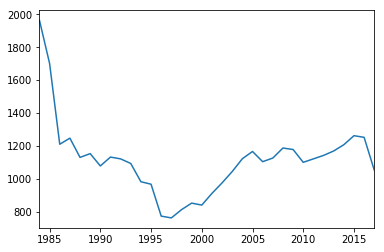

In [22]:
gas['year'].value_counts().sort_index().plot()

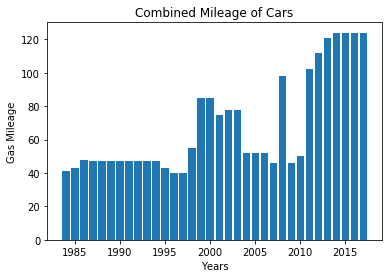

In [23]:
fig, ax = plt.subplots()
ax.bar(gas['year'], gas['comb08'])
plt.xlabel('Years')
plt.ylabel('Gas Mileage')
plt.title('Combined Mileage of Cars')
plt.show()

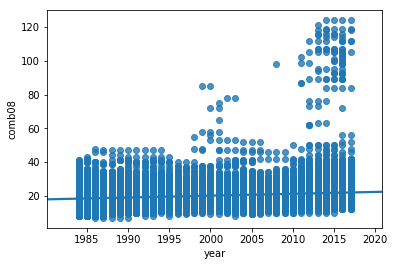

In [24]:
import seaborn as sns
sns.regplot(y="comb08", x="year", data=gas, fit_reg = True)

In [25]:
x = ols('year ~ comb08 + city08 + highway08 + UCity + UCityA + UHighway + UHighwayA + cylinders + evMotor + displ + fuelCost08 + barrels08 + ghgScore',gas).fit()
print(x.summary())

                            OLS Regression Results                            
Dep. Variable:                   year   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     280.6
Date:                Mon, 08 Jul 2019   Prob (F-statistic):               0.00
Time:                        11:38:40   Log-Likelihood:            -1.3046e+05
No. Observations:               37936   AIC:                         2.612e+05
Df Residuals:                   37812   BIC:                         2.622e+05
Df Model:                         123                                         
Covariance Type:            nonrobust                                         
                                                                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

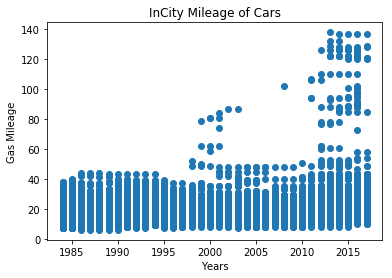

In [26]:
fig, ax = plt.subplots()
ax.scatter(gas['year'], gas['city08'])
plt.xlabel('Years')
plt.ylabel('Gas Mileage')
plt.title('InCity Mileage of Cars')
plt.show()

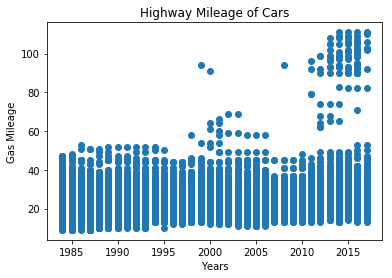

In [27]:
fig, ax = plt.subplots()
ax.scatter(gas['year'], gas['highway08'])
plt.xlabel('Years')
plt.ylabel('Gas Mileage')
plt.title('Highway Mileage of Cars')
plt.show()

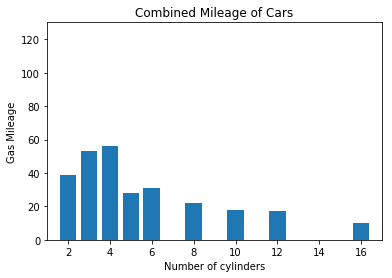

In [28]:
fig, ax = plt.subplots()
ax.bar(gas['cylinders'], gas['comb08'])
plt.xlabel('Number of cylinders')
plt.ylabel('Gas Mileage')
plt.title('Combined Mileage of Cars')
plt.xlim([1, 17])
plt.show()

In [29]:
grouped = gas.groupby("year")
averaged = grouped['comb08', 'highway08', 'city08'].agg([np.mean])
averaged.columns = ['comb08_mean', 'highway08_mean', 'city08_mean']
print(averaged)

      comb08_mean  highway08_mean  city08_mean
year                                          
1984    19.881874       23.075356    17.982688
1985    19.808348       23.042328    17.878307
1986    19.550413       22.699174    17.665289
1987    19.228549       22.445068    17.310345
1988    19.328319       22.702655    17.333628
1989    19.125759       22.465742    17.143972
1990    19.000928       22.337662    17.033395
1991    18.825972       22.253534    16.848940
1992    18.862623       22.439786    16.805531
1993    19.104300       22.780421    16.998170
1994    19.012220       22.725051    16.918534
1995    18.797311       22.671148    16.569804
1996    19.584735       23.569211    17.289780
1997    19.429134       23.451444    17.135171
1998    19.518473       23.546798    17.113300
1999    19.611502       23.552817    17.272300
2000    19.526190       23.414286    17.221429
2001    19.479693       23.328211    17.275521
2002    19.168205       23.030769    16.893333
2003    19.00

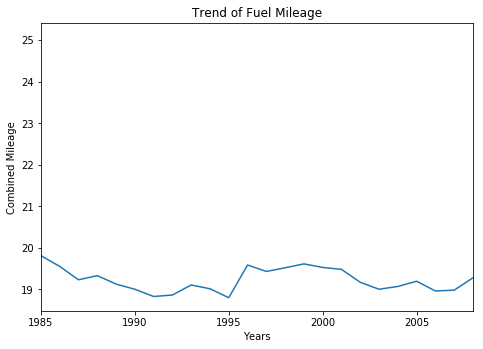

<Figure size 432x288 with 0 Axes>

In [30]:
fig = plt.figure()
ax = fig.add_axes([1,1,1,1])
ax.plot(averaged['comb08_mean'])
plt.xlabel('Years')
plt.ylabel('Combined Mileage')
plt.title('Trend of Fuel Mileage')
plt.xlim([1985, 2008])
plt.show()
plt.savefig('fig3.png', bbox_inches='tight')

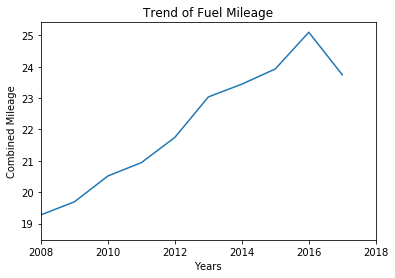

In [31]:
fig, ax = plt.subplots()
ax.plot(averaged['comb08_mean'])
plt.xlabel('Years')
plt.ylabel('Combined Mileage')
plt.title('Trend of Fuel Mileage')
plt.xlim([2008, 2018])
plt.show()

In [32]:
group = gas.groupby("cylinders")
average = group['comb08', 'highway08', 'city08'].agg([np.mean])
average.columns = ['comb08_mean', 'highway08_mean', 'city08_mean']
print(average.head())

           comb08_mean  highway08_mean  city08_mean
cylinders                                          
0.0          90.130081       85.715447    94.756098
2.0          19.163636       22.909091    17.127273
3.0          36.423077       40.062500    33.913462
4.0          23.969891       28.053466    21.505167
5.0          20.257180       24.516971    17.748042


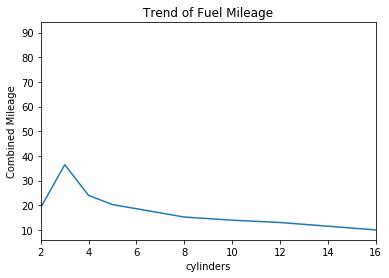

In [33]:
fig, ax = plt.subplots()
ax.plot(average['comb08_mean'])
plt.xlabel('cylinders')
plt.ylabel('Combined Mileage')
plt.title('Trend of Fuel Mileage')
plt.xlim([2, 16])
plt.show()

In [34]:
criteria = gas.atvType == 'Hybrid'
vehicles_hybrid = gas[criteria]
len(vehicles_hybrid)

472

In [35]:
print(vehicles_hybrid.head())

      year    make    model  barrels08  city08  comb08  highway08  cylinders  \
6230  2000   Honda  Insight   6.219057      49      53         61        3.0   
7162  2001   Honda  Insight   7.012979      45      47         49        3.0   
7163  2001   Honda  Insight   7.012979      45      47         49        3.0   
7164  2001   Honda  Insight   6.219057      48      53         60        3.0   
7451  2001  Toyota    Prius   8.039268      42      41         41        4.0   

            VClass              drive  ...  trans_dscr  tCharger  sCharger  \
6230   Two Seaters  Front-Wheel Drive  ...         SIL         0         0   
7162   Two Seaters  Front-Wheel Drive  ...           0         0         0   
7163   Two Seaters  Front-Wheel Drive  ...           0         0         0   
7164   Two Seaters  Front-Wheel Drive  ...         SIL         0         0   
7451  Compact Cars  Front-Wheel Drive  ...           0         0         0   

     atvType  fuelType2  rangeA evMotor           

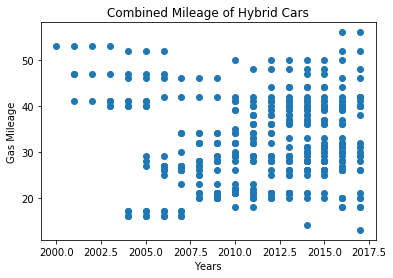

In [36]:
fig, ax = plt.subplots()
ax.scatter(vehicles_hybrid['year'], vehicles_hybrid['comb08'])
plt.xlabel('Years')
plt.ylabel('Gas Mileage')
plt.title('Combined Mileage of Hybrid Cars')
plt.show()

In [37]:
criteria1 = gas.atvType == 'EV'
vehicles_electric = gas[criteria1]
len(vehicles_electric)

120

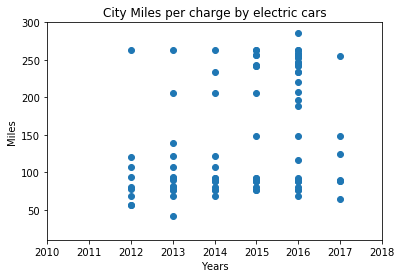

In [38]:
fig, ax = plt.subplots()
ax.scatter(vehicles_electric['year'], vehicles_electric['rangeCity'])
plt.xlabel('Years')
plt.ylabel('Miles')
plt.title('City Miles per charge by electric cars')
plt.xlim([2010, 2018])
plt.ylim([10,300])
plt.show()

In [39]:
gas['gas_range'] = gas['barrels08'] * gas['comb08']

In [40]:
avg_range = grouped['gas_range'].agg([np.mean])
avg_range.columns = ['gas_range_mean']
print(avg_range)

      gas_range_mean
year                
1984      336.623569
1985      334.493510
1986      332.694979
1987      331.971026
1988      331.052323
1989      331.114749
1990      331.024355
1991      331.421330
1992      330.688702
1993      330.368371
1994      330.935942
1995      331.010879
1996      330.070188
1997      329.938839
1998      328.163209
1999      325.762099
2000      326.561557
2001      325.740105
2002      327.726012
2003      328.511043
2004      327.788543
2005      328.835815
2006      329.741726
2007      329.645768
2008      329.383089
2009      329.599559
2010      329.551023
2011      328.067164
2012      326.435944
2013      325.384521
2014      324.610581
2015      324.295916
2016      321.068853
2017      326.199014


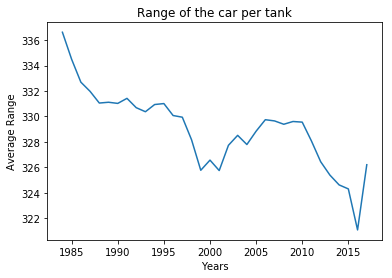

In [41]:
fig, ax = plt.subplots()
ax.plot(avg_range['gas_range_mean'])
plt.xlabel('Years')
plt.ylabel('Average Range')
plt.title('Range of the car per tank')
plt.show()

In [42]:
np.mean(gas['comb08']), np.median(gas['comb08']), np.std(gas['comb08'])

(20.16564740615774, 19.0, 6.591537171743222)

In [43]:
grouped = gas.groupby("year")
ave = grouped['co2TailpipeGpm'].agg([np.mean])
ave.columns = ['co2TailpipeGpm']
print(ave)


      co2TailpipeGpm
year                
1984      489.237134
1985      487.146809
1986      490.453261
1987      499.584207
1988      493.083160
1989      499.143177
1990      499.800704
1991      504.270073
1992      502.228115
1993      494.837784
1994      494.883790
1995      502.192460
1996      479.560836
1997      482.244867
1998      479.279442
1999      478.399343
2000      480.159386
2001      481.426990
2002      487.740735
2003      493.211136
2004      488.114786
2005      486.015500
2006      490.083168
2007      488.015485
2008      484.228005
2009      472.894286
2010      455.575235
2011      451.750945
2012      439.213880
2013      421.562019
2014      415.044739
2015      405.784469
2016      392.239617
2017      401.562203


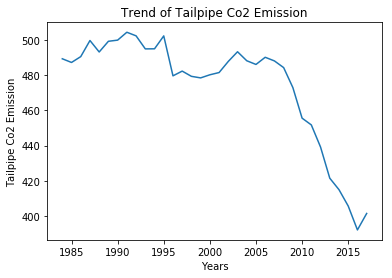

In [44]:
fig, ax = plt.subplots()
ax.plot(ave['co2TailpipeGpm'])
plt.xlabel('Years')
plt.ylabel('Tailpipe Co2 Emission')
plt.title('Trend of Tailpipe Co2 Emission')
plt.show()

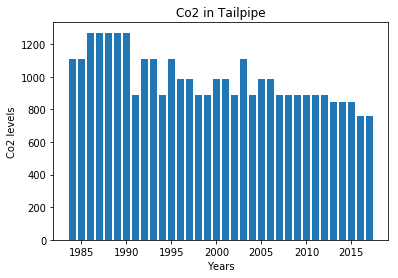

In [45]:
fig, ax = plt.subplots()
ax.bar(gas['year'], gas['co2TailpipeGpm'])
plt.xlabel('Years')
plt.ylabel('Co2 levels')
plt.title('Co2 in Tailpipe')
plt.show()

In [46]:
Co2 = gas[['year','displ','cylinders','comb08','co2TailpipeGpm']]
Co2.head()

,year,displ,cylinders,comb08,co2TailpipeGpm
0,1985,2.0,4.0,21,423.190476
1,1985,4.9,12.0,11,807.909091
2,1985,2.2,4.0,27,329.148148
3,1985,5.2,8.0,11,807.909091
4,1993,2.2,4.0,19,467.736842


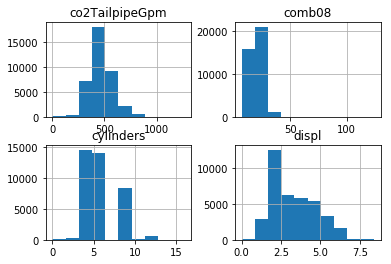

In [47]:
img = Co2[['displ','cylinders','comb08','co2TailpipeGpm']]
img.hist()
plt.show()

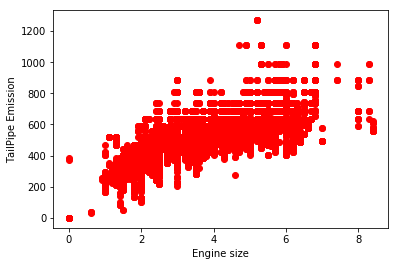

In [48]:
plt.scatter(Co2.displ, Co2.co2TailpipeGpm,  color='red')
plt.xlabel("Engine size")
plt.ylabel("TailPipe Emission")
plt.show()

In [49]:
vlu = np.random.rand(len(gas)) < 0.8
train = Co2[vlu]
test = Co2[~vlu]

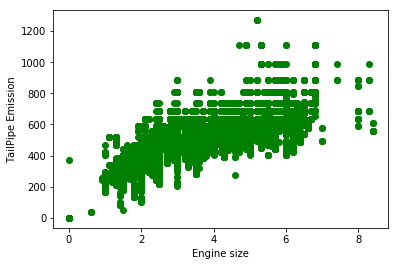

In [50]:
plt.scatter(train.displ, train.co2TailpipeGpm,  color='green')
plt.xlabel("Engine size")
plt.ylabel("TailPipe Emission")
plt.show()

In [76]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['displ', 'comb08']])
train_y = np.asanyarray(train[['co2TailpipeGpm']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[40.76008477 -9.95022747]]
Intercept:  [539.19533413]


(0, 1500)

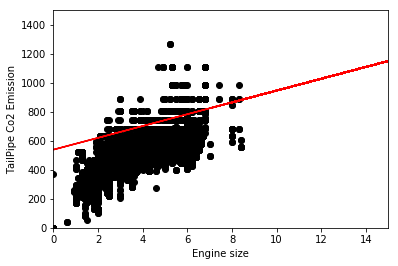

In [82]:
plt.scatter(train.displ, train.co2TailpipeGpm,  color='black')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("TailPipe Co2 Emission")
plt.xlim([0,15])
plt.ylim([0,1500])

In [78]:
from sklearn.metrics import r2_score


test1 = np.asanyarray(test[['displ', 'comb08']])
test2 = np.asanyarray(test[['co2TailpipeGpm']])
test3 = regr.predict(test1)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test3 - test2)))
print("Mean squared error (MSE): %.2f" % np.mean((test3 - test2) ** 2))
print("R2-score: %.2f" % r2_score(test3 , test2) )

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(test1, test2))

Mean absolute error: 32.83
Mean squared error (MSE): 2925.39
R2-score: 0.77
Variance score: 0.79


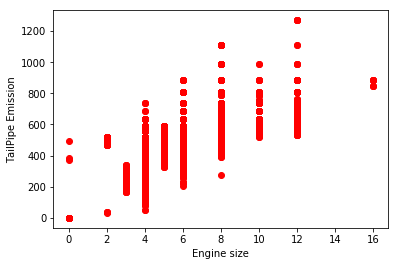

In [102]:
plt.scatter(Co2.cylinders, Co2.co2TailpipeGpm,  color='red')
plt.xlabel("Engine size")
plt.ylabel("TailPipe Emission")
plt.show()

In [72]:
regr = linear_model.LinearRegression()
train_c = np.asanyarray(train[['cylinders', 'comb08']])
train_y = np.asanyarray(train[['co2TailpipeGpm']])
regr.fit (train_c, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[ 26.53368813 -10.92080509]]
Intercept:  [541.6960344]


Text(0, 0.5, 'TailPipe Co2 Emission')

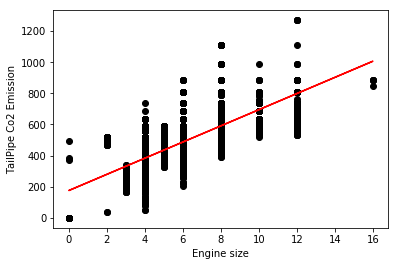

In [104]:
plt.scatter(train.cylinders, train.co2TailpipeGpm,  color='black')
plt.plot(train_c, regr.coef_[0][0]*train_c + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("TailPipe Co2 Emission")

In [74]:
from sklearn.metrics import r2_score

testa = np.asanyarray(test[['cylinders','comb08']])
testb = np.asanyarray(test[['co2TailpipeGpm']])
testc = regr.predict(testa)

print("Mean absolute error: %.2f" % np.mean(np.absolute(testc - testb)))
print("Mean squared error (MSE): %.2f" % np.mean((testc - testb) ** 2))
print("R2-score: %.2f" % r2_score(testc , testb) )

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(testa, testb))

Mean absolute error: 35.75
Mean squared error (MSE): 3464.74
R2-score: 0.72
Variance score: 0.76


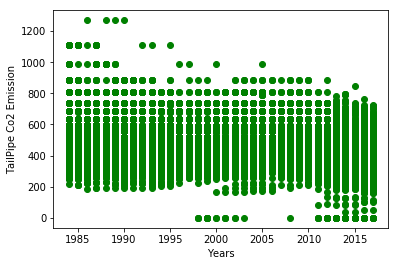

In [106]:
plt.scatter(train.year, train.co2TailpipeGpm,  color='green')
plt.xlabel("Years")
plt.ylabel("TailPipe Co2 Emission")
plt.show()

In [107]:
regr = linear_model.LinearRegression()
train_a = np.asanyarray(train[['year']])
train_b = np.asanyarray(train[['co2TailpipeGpm']])
regr.fit (train_a, train_b)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[-2.41206196]]
Intercept:  [5297.6525306]


Text(0, 0.5, 'TailPipe Co2 Emission')

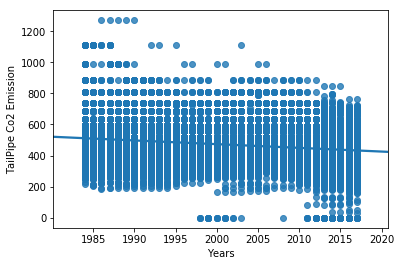

In [108]:
sns.regplot(y="co2TailpipeGpm", x="year", data=gas, fit_reg = True)
plt.xlabel("Years")
plt.ylabel("TailPipe Co2 Emission")

In [46]:
m = ols('year ~ co2TailpipeGpm + ghgScore + displ + cylinders',gas).fit()
print(m.summary())
print("R-Square = 0.414 ")

                            OLS Regression Results                            
Dep. Variable:                   year   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.414
Method:                 Least Squares   F-statistic:                     6700.
Date:                Tue, 25 Jun 2019   Prob (F-statistic):               0.00
Time:                        16:36:17   Log-Likelihood:            -1.3262e+05
No. Observations:               37936   AIC:                         2.653e+05
Df Residuals:                   37931   BIC:                         2.653e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2001.8295      0.202   9933.